# 1.0 Setup


In [1]:
# Importing necessary libraries

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random as rn
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [2]:
# Loading datasets

crop_rec = pd.read_csv(r"C:\Users\USER\Documents\APU\Moodle\Sem 3\CP2\Datasets\Crop recommendation (India)\Crop_recommendation.csv")
crop_pred = pd.read_csv(r"C:\Users\USER\Documents\APU\Moodle\Sem 3\CP2\Datasets\Crop prediction\yield_df1.csv")

In [3]:
# Defining function to set seed for ensuring reproducibility of experiments

def set_seed(seed):
    np.random.seed(seed)
    rn.seed(seed)
    
    return

In [4]:
# Setting seed

set_seed(10)

# 2.0 Initial Data Exploration (IDE)

In [5]:
# Determining no. of rows and columns in crop_rec dataset

crop_rec.shape

(2200, 8)

In [6]:
# Determining no. of rows and columns in crop_pred dataset

crop_pred.shape

(101, 7)

In [7]:
# Viewing 1st few rows of crop_rec dataset

crop_rec.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [8]:
# Viewing all the classes in the "label" variable of crop_rec dataset

unique_classes = crop_rec['label'].unique()
print(unique_classes)

['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']


In [9]:
# Viewing 1st few rows of crop_pred dataset

crop_pred.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,avg_temp,Planted Area (Hectare)
0,El Salvador,"Rice, paddy",2012,63968,1784.00,26.04,4000
1,El Salvador,"Rice, paddy",2013,61615,1955.50,26.36,6000
2,El Salvador,"Rice, paddy",2014,73000,1491.11,25.38,7000
3,El Salvador,"Rice, paddy",2015,60000,1607.04,25.71,6000
4,El Salvador,"Rice, paddy",2016,63000,1679.37,25.75,4000


In [10]:
# Viewing all the classes in the "Area" variable of crop_pred dataset

unique_areas = crop_pred['Area'].unique()

print("Unique Areas:")
print(unique_areas)

Unique Areas:
['El Salvador' 'Guinea' 'Indonesia' 'Malaysia' 'Sri Lanka' 'Suriname'
 'Thailand']


In [11]:
# Viewing metadata of crop_rec dataset

crop_rec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


No missing data found in crop_rec dataset. So no imputation.

In [12]:
# Viewing metadata of crop_pred dataset

crop_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           101 non-null    object 
 1   Item                           101 non-null    object 
 2   Year                           101 non-null    int64  
 3   hg/ha_yield                    101 non-null    int64  
 4   average_rain_fall_mm_per_year  101 non-null    float64
 5   avg_temp                       101 non-null    float64
 6   Planted Area (Hectare)         101 non-null    int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 5.7+ KB


No missing data found in crop_pred dataset. So no imputation.

In [13]:
# Checking for duplicates in the crop_rec dataset

print(crop_rec.duplicated().sum())

0


No duplicates found in crop_rec dataset.

In [14]:
# Checking for duplicates in the crop_pred dataset

print(crop_pred.duplicated().sum())

0


No duplicates found in crop_pred dataset.

# 3.0 Pre-Processing

In [15]:
# To transform all classes that are not rice into 'non-rice' from the "label" variable of crop_rec dataset

crop_rec['label'] = crop_rec['label'].replace(['maize', 'chickpea', 'kidneybeans', 'pigeonpeas', 'mothbeans',
                                               'mungbean', 'blackgram', 'lentil', 'pomegranate', 'banana',
                                               'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
                                               'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
                                              'non-rice')

# Display updated values
print(crop_rec['label'].unique())


['rice' 'non-rice']


In [16]:
# Renaming variable names in crop_rec dataset

crop_rec.rename(columns = {'temperature':'Temperature', 'humidity':'Humidity', 'ph':'pH Value', 'rainfall':'Rainfall', 'label':'Crop'}, inplace = True)
crop_rec.head()

,N,P,K,Temperature,Humidity,pH Value,Rainfall,Crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [17]:
# Renaming variable names in crop_pred dataset

crop_pred.rename(columns = {'Area':'Location', 'hg/ha_yield':'Yield', 'average_rain_fall_mm_per_year': 'Rainfall', 'avg_temp': 'Temperature', 'Planted Area (Hectare)': 'Planted Area'}, inplace = True)
crop_pred.head()

,Location,Item,Year,Yield,Rainfall,Temperature,Planted Area
0,El Salvador,"Rice, paddy",2012,63968,1784.00,26.04,4000
1,El Salvador,"Rice, paddy",2013,61615,1955.50,26.36,6000
2,El Salvador,"Rice, paddy",2014,73000,1491.11,25.38,7000
3,El Salvador,"Rice, paddy",2015,60000,1607.04,25.71,6000
4,El Salvador,"Rice, paddy",2016,63000,1679.37,25.75,4000


In [18]:
# Rearranging the columns with target variable at the last column

crop_pred = crop_pred[["Location", "Item", "Year", "Rainfall", "Temperature", "Planted Area", "Yield"]]
crop_pred.head()

,Location,Item,Year,Rainfall,Temperature,Planted Area,Yield
0,El Salvador,"Rice, paddy",2012,1784.00,26.04,4000,63968
1,El Salvador,"Rice, paddy",2013,1955.50,26.36,6000,61615
2,El Salvador,"Rice, paddy",2014,1491.11,25.38,7000,73000
3,El Salvador,"Rice, paddy",2015,1607.04,25.71,6000,60000
4,El Salvador,"Rice, paddy",2016,1679.37,25.75,4000,63000


# 4.0 Exploratory Data Analysis (EDA)

In [19]:
# Viewing descriptive statistic of crop_rec dataset

crop_rec.describe()

,N,P,K,Temperature,Humidity,pH Value,Rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [20]:
# Viewing descriptive statistic of crop_pred dataset

crop_pred.describe()

,Year,Rainfall,Temperature,Planted Area,Yield
count,101.000000,101.000000,101.000000,1.010000e+02,101.000000
mean,2009.980198,2444.921782,26.676733,2.786171e+06,37220.168317
std,11.376274,603.536799,0.675199,4.330603e+06,13659.054468
min,1980.000000,1381.120000,25.040000,4.000000e+03,12000.000000
25%,2006.000000,1802.590000,26.080000,6.589540e+05,28000.000000
50%,2014.000000,2519.330000,26.840000,6.855480e+05,37205.000000
75%,2018.000000,2915.950000,27.270000,1.673000e+06,46000.000000
max,2021.000000,3580.210000,27.890000,1.500000e+07,73000.000000


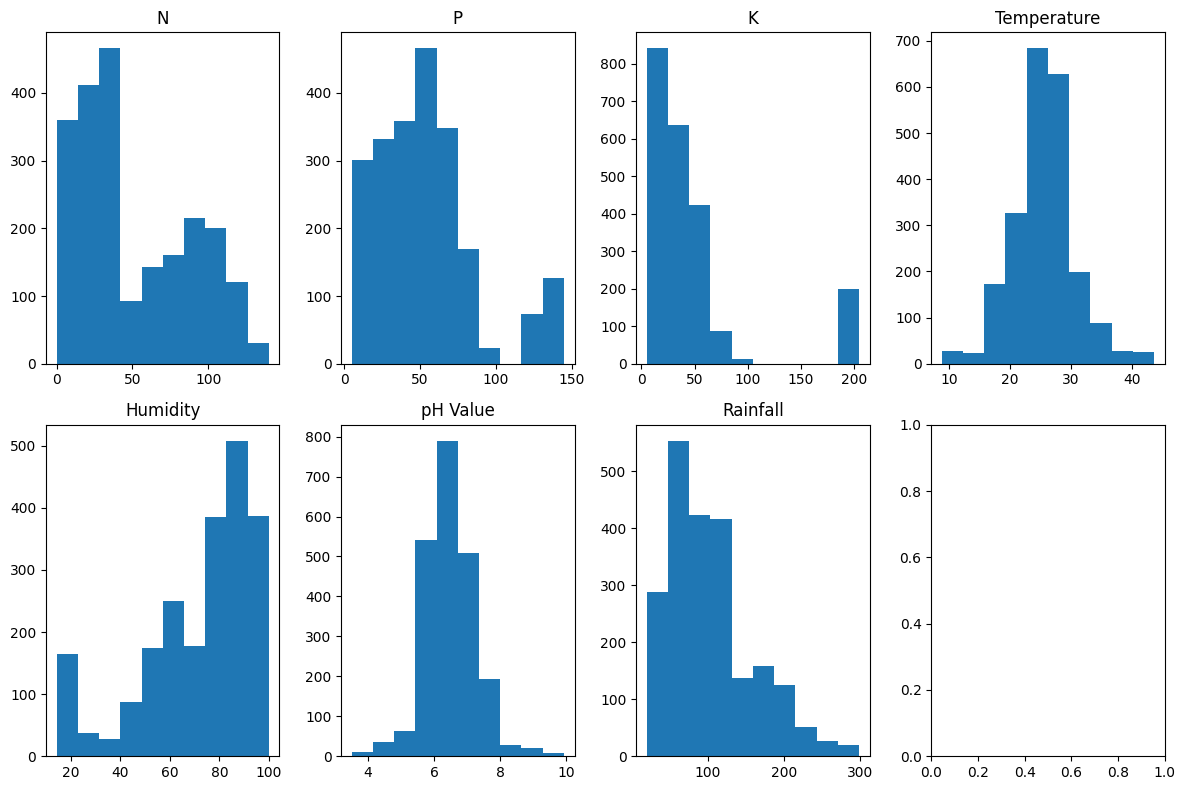

In [21]:
# Checking distribution of each numerical variable in crop_rec dataset

# Creating 2x4 subplot grid
fig, axs = plt.subplots(2, 4, figsize=(12, 8))

# Defining list of numerical variables
variables = ['N', 'P', 'K', 'Temperature', 'Humidity', 'pH Value', 'Rainfall']

# Loop each numerical variable and create histogram for each numerical variable in a subplot
for i, variable in enumerate(variables):
    row = i // 4  # calculate row index
    col = i % 4   # calculate column index
    axs[row, col].hist(crop_rec[variable])
    axs[row, col].set_title(variable)

# Display subplots
plt.tight_layout()
plt.show()

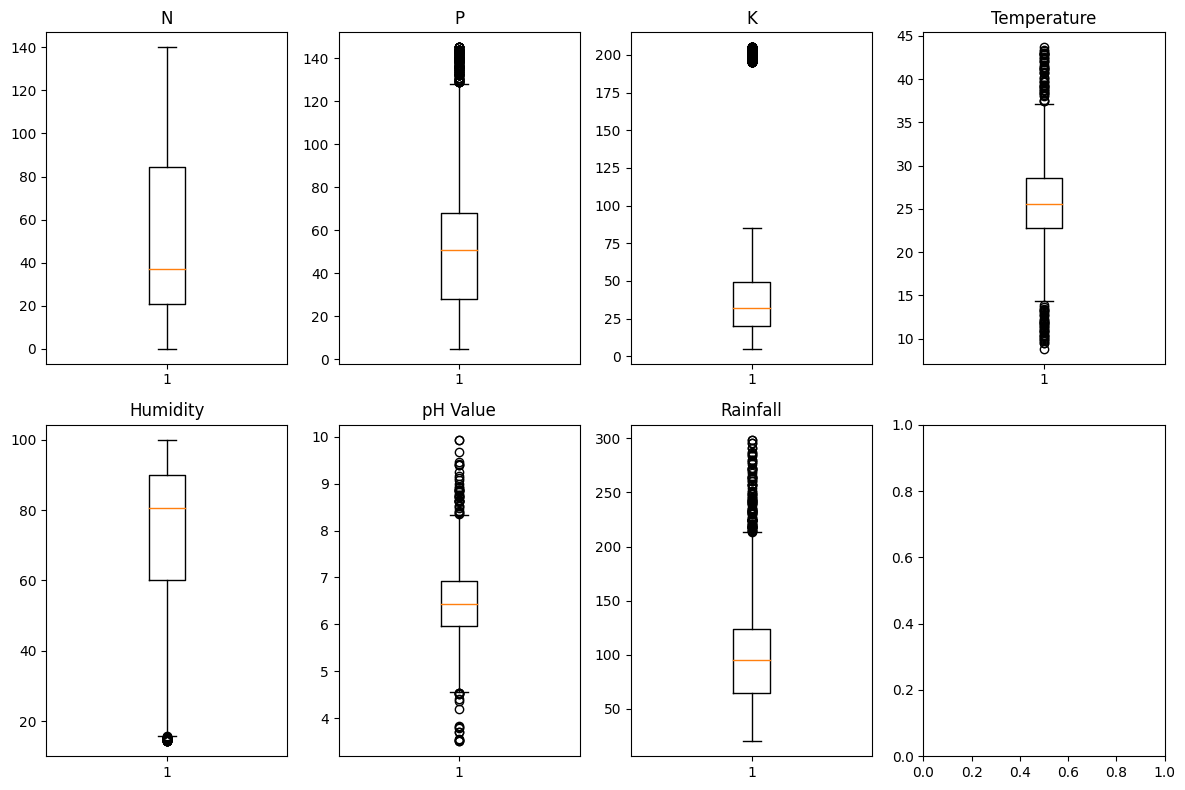

In [22]:
# Checking for outliers in each numerical variable in crop_rec dataset

# Creating 2x4 subplot grid
fig, axs = plt.subplots(2, 4, figsize=(12, 8))

# Defining list of numerical variables
variables = ['N', 'P', 'K', 'Temperature', 'Humidity', 'pH Value', 'Rainfall']

# Loop each numerical variable and create boxplotfor each numerical variable in a subplot
for i, variable in enumerate(variables):
    row = i // 4  # calculate row index
    col = i % 4   # calculate column index
    axs[row, col].boxplot(crop_rec[variable])
    axs[row, col].set_title(variable)

# Display subplots
plt.tight_layout()
plt.show()

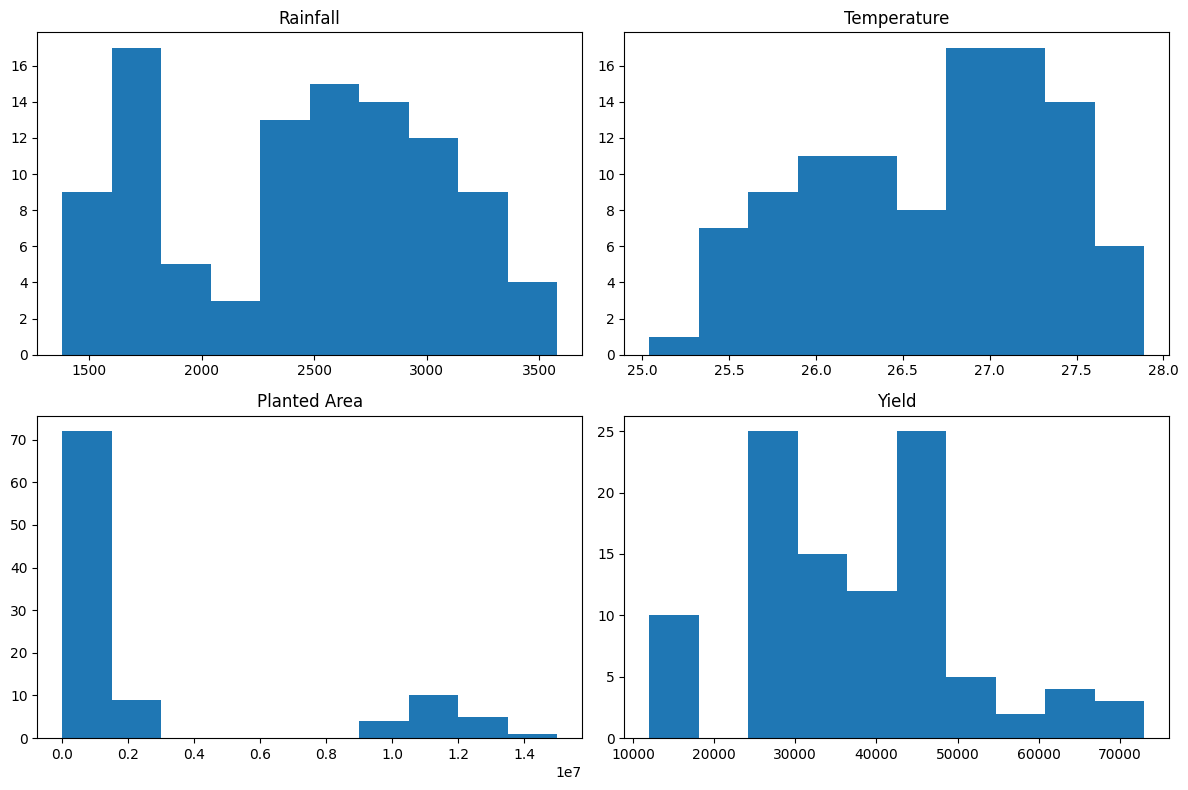

In [23]:
# Checking distribution of each numerical variable in crop_pred dataset

# Creating 2x2 subplot grid
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Defining list of numerical variables
variables = ['Rainfall', 'Temperature', 'Planted Area', 'Yield']

# Loop each numerical variable and create histogram for each numerical variable in a subplot
for i, variable in enumerate(variables):
    row = i // 2  # calculate row index
    col = i % 2   # calculate column index
    axs[row, col].hist(crop_pred[variable])
    axs[row, col].set_title(variable)

# Display subplots
plt.tight_layout()
plt.show()

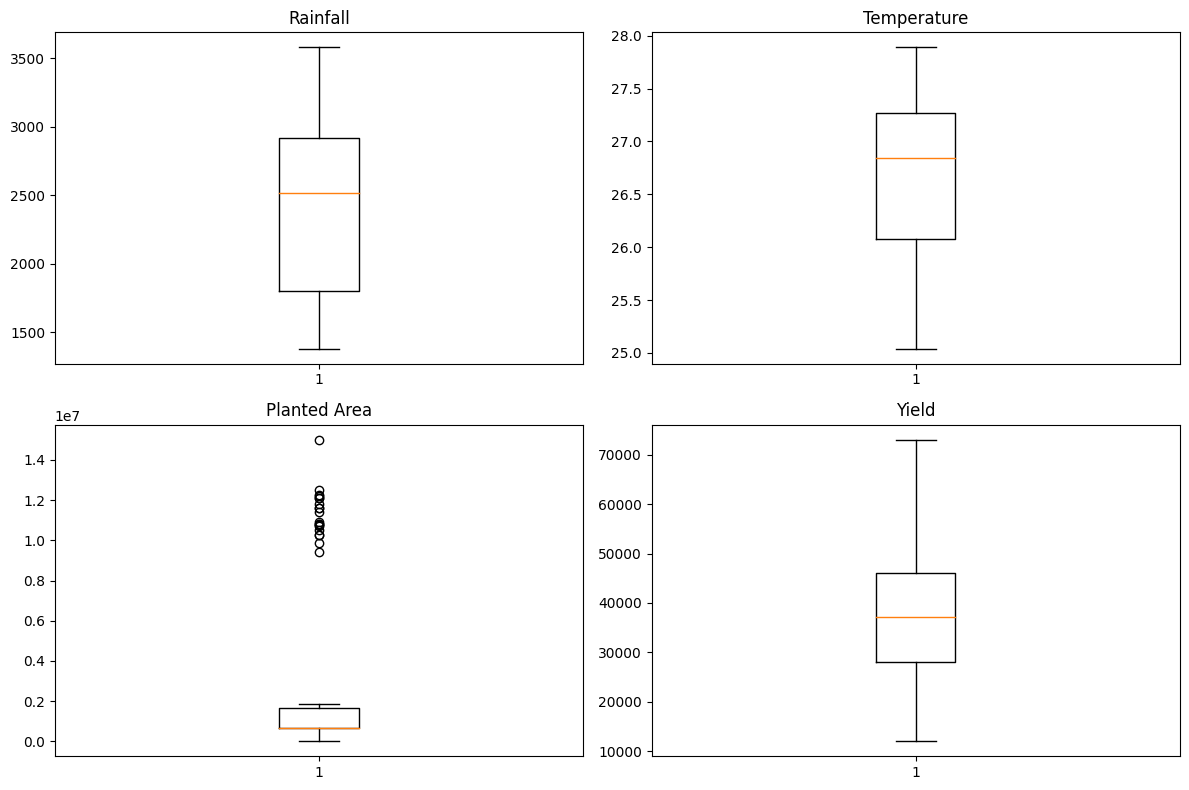

In [24]:
# Checking for outliers in each numerical variable in crop_pred dataset

# Creating 2x2 subplot grid
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Defining list of numerical variables
variables = ['Rainfall', 'Temperature', 'Planted Area', 'Yield']

# Loop each numerical variable and create histogram for each numerical variable in a subplot
for i, variable in enumerate(variables):
    row = i // 2  # calculate row index
    col = i % 2   # calculate column index
    axs[row, col].boxplot(crop_pred[variable])
    axs[row, col].set_title(variable)

# Display subplots
plt.tight_layout()
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_1484\1360463161.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(crop_rec.corr(), annot =True)


Text(0.5, 1.0, 'Correlation Matrix of Rice Recommendation dataset')

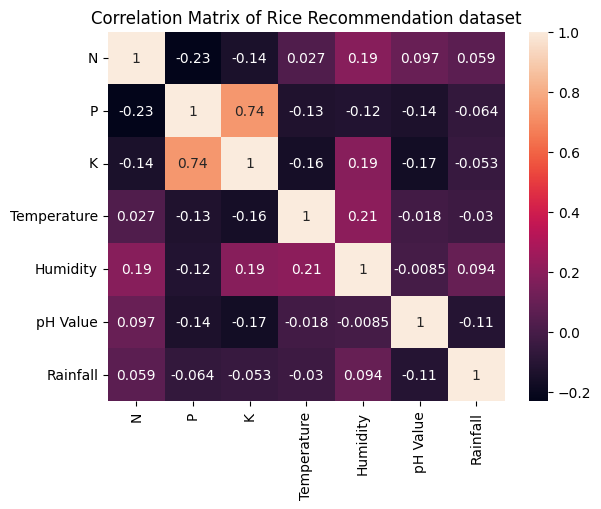

In [25]:
# Plotting correlation matirx of crop_rec dataset

sns.heatmap(crop_rec.corr(), annot =True)
plt.title('Correlation Matrix of Rice Recommendation dataset')

C:\Users\USER\AppData\Local\Temp\ipykernel_1484\3799898014.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(crop_pred.corr(), annot =True)


Text(0.5, 1.0, 'Correlation Matrix of Rice Prediction dataset')

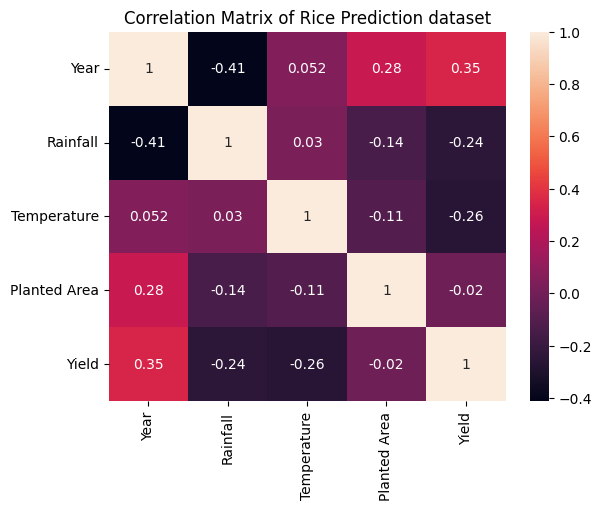

In [26]:
# Plotting correlation matirx of crop_pred dataset

sns.heatmap(crop_pred.corr(), annot =True)
plt.title('Correlation Matrix of Rice Prediction dataset')

In [27]:
# Counting frequency of 'rice' and 'non-rice' classes in the crop_rec datatset

counts = crop_rec['Crop'].value_counts()
print(counts)

non-rice    2100
rice         100
Name: Crop, dtype: int64


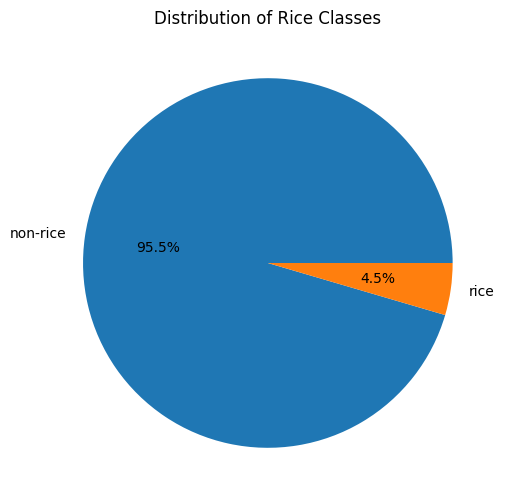

In [28]:
# Illustrating frequency of 'rice' and 'non-rice' classes

# Calculate the frequency count of each class in the "Crop" variable
class_counts = crop_rec['Crop'].value_counts()

# Creating pie chart
plt.figure(figsize=(8, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Rice Classes')

# Display pie chart
plt.show()

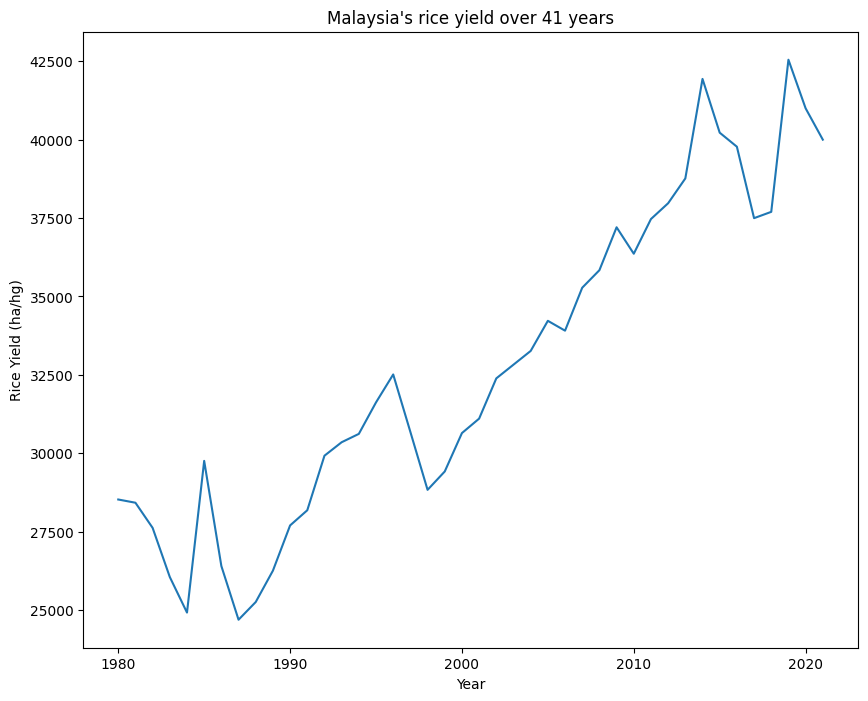

In [29]:
# Illustrating Malaysia's rice yield trend from 1980 to 2021

fig, ax = plt.subplots(figsize = (10, 8))

# Filtering dataset for rows with Area = "Malaysia"
malaysia_yield = crop_pred[crop_pred["Location"] == "Malaysia"]

# Plotting line chart
ax.plot(malaysia_yield["Year"], malaysia_yield["Yield"])
ax.set_title("Malaysia's rice yield over 41 years")
ax.set_xlabel("Year")
ax.set_ylabel("Rice Yield (ha/hg)")

# Display plot
plt.show()

# 5.0 Data Preparation


### 5.1 Stratified Sampling

In [30]:
# Splitting the crop_rec datatset into training and testing samples of 70:30 ratio

X = crop_rec.drop('Crop', axis=1)  # Input variables
y = crop_rec['Crop']  # Target variable

X_rec_train, X_rec_test, y_rec_train, y_rec_test = train_test_split(X, y, train_size=0.7, test_size=0.3, stratify=y, random_state=1)

In [31]:
# Displaying shapes of input & target variables in crop_rec train & test set

print("X_rec_train :",X_rec_train.shape)
print("X_rec_test  :",X_rec_test.shape)
print("y_rec_train :",y_rec_train.shape)
print("y_rec_test  :",y_rec_test.shape)

X_rec_train : (1540, 7)
X_rec_test  : (660, 7)
y_rec_train : (1540,)
y_rec_test  : (660,)


### 5.2 Random Sampling

In [32]:
# Splitting the crop_pred datatset into training and testing samples of 80:20 ratio
X = crop_pred[['Rainfall', 'Temperature', 'Planted Area']]  # Input variables
y = crop_pred['Yield']  # Target variable

X_pred_train, X_pred_test, y_pred_train, y_pred_test = train_test_split(X, y, train_size=0.8, test_size=0.2, shuffle = True, random_state=1)

In [33]:
# Displaying shapes of input & target variables in crop_pred train & test set

print("X_pred_train :",X_pred_train.shape)
print("X_pred_test  :",X_pred_test.shape)
print("y_pred_train :",y_pred_train.shape)
print("y_pred_test  :",y_pred_test.shape)

X_pred_train : (80, 3)
X_pred_test  : (21, 3)
y_pred_train : (80,)
y_pred_test  : (21,)


### 5.3 SMOTE 

In [34]:
# SMOTE oversampling the crop_rec target variable classes

smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_rec_train, y_rec_train)

# Display SMOTE results
print(y_train_smote.value_counts())
print(X_train_smote, y_train_smote)

non-rice    1470
rice        1470
Name: Crop, dtype: int64
       N   P   K  Temperature   Humidity  pH Value    Rainfall
0     52  63  19    29.589490  68.321768  6.928899   67.530212
1     88  78  45    29.104035  79.195886  6.324270   92.078358
2     17  59  17    18.416700  23.428299  5.689858  132.980105
3      5  55  18    33.508764  45.709761  7.322098  126.673812
4     12  61  19    19.331626  24.139950  5.655727   68.512534
...   ..  ..  ..          ...        ...       ...         ...
2935  83  58  40    21.882468  80.528749  6.984013  226.235849
2936  64  43  37    23.083947  81.440369  5.931051  253.782977
2937  69  39  41    23.234987  82.434414  6.448067  254.712494
2938  88  54  37    24.588621  83.453741  6.700297  231.193815
2939  84  39  39    22.642182  80.575935  7.020618  208.725839

[2940 rows x 7 columns] 0       non-rice
1       non-rice
2       non-rice
3       non-rice
4       non-rice
          ...   
2935        rice
2936        rice
2937        rice
2938   

Increased crop_rec training set to 2940 samples now

# 6.0 Modelling & Optimization

In [35]:
# Importing necessary modelling libraries

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score, precision_score , recall_score, confusion_matrix, roc_auc_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV

### 6.1 Rice Recommendation

6.1.1 Decision Tree Classifier

In [36]:
# Creating Decision Tree Classifier Model
dtc = DecisionTreeClassifier(random_state=1, max_depth=5, min_samples_split=2, min_samples_leaf=1, ccp_alpha=0.01)

# Fitting the model to the training data (post SMOTE)
dtc.fit(X_train_smote, y_train_smote)

# Making predictions using the testing data
dt_rec = dtc.predict(X_rec_test)
dt_rec

array(['non-rice', 'non-rice', 'non-rice', 'non-rice', 'non-rice', 'rice',
       'non-rice', 'non-rice', 'non-rice', 'non-rice', 'non-rice',
       'non-rice', 'non-rice', 'non-rice', 'non-rice', 'non-rice',
       'non-rice', 'non-rice', 'non-rice', 'non-rice', 'non-rice',
       'non-rice', 'non-rice', 'non-rice', 'non-rice', 'non-rice',
       'non-rice', 'non-rice', 'non-rice', 'non-rice', 'non-rice',
       'non-rice', 'non-rice', 'non-rice', 'non-rice', 'non-rice',
       'non-rice', 'non-rice', 'non-rice', 'non-rice', 'non-rice', 'rice',
       'non-rice', 'non-rice', 'non-rice', 'non-rice', 'non-rice',
       'non-rice', 'non-rice', 'non-rice', 'non-rice', 'non-rice',
       'non-rice', 'non-rice', 'non-rice', 'non-rice', 'non-rice',
       'non-rice', 'non-rice', 'non-rice', 'non-rice', 'non-rice',
       'non-rice', 'non-rice', 'non-rice', 'non-rice', 'non-rice',
       'non-rice', 'non-rice', 'non-rice', 'non-rice', 'non-rice',
       'non-rice', 'non-rice', 'non-rice', 'no

In [37]:
# Calculating Accuracy, Precision, Recall and AUC
a1 = accuracy_score(y_rec_test,dt_rec)*100
a2 = precision_score(y_rec_test,dt_rec, pos_label='rice')*100 
a3 = recall_score(y_rec_test,dt_rec, pos_label='rice')*100
a4 = roc_auc_score(y_rec_test.replace({"rice": 1, "non-rice": 0}),pd.Series(dt_rec).replace({"rice":1, "non-rice":0}))

print('DT Classifier Evaluation Scores\n')
print('Accuracy score   :', accuracy_score(y_rec_test,dt_rec)*100)
print('Precision score  :', precision_score(y_rec_test,dt_rec, pos_label='rice')*100)
print('Recall score     :', recall_score(y_rec_test,dt_rec, pos_label='rice')*100)
print('AUC score        :', roc_auc_score(y_rec_test.replace({"rice": 1, "non-rice": 0}),pd.Series(dt_rec).replace({"rice":1, "non-rice":0})))

DT Classifier Evaluation Scores

Accuracy score   : 99.0909090909091
Precision score  : 83.33333333333334
Recall score     : 100.0
AUC score        : 0.9952380952380953


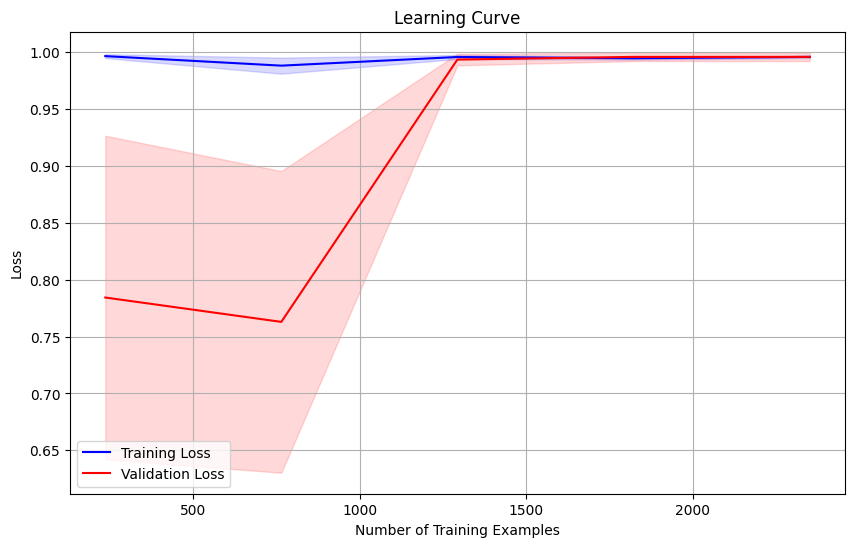

In [86]:
# Compute learning curve data
train_sizes, train_scores, test_scores = learning_curve(dtc, X_train_smote, y_train_smote, cv=5, train_sizes=np.linspace(0.1, 1.0, 5))

# Calculate mean and standard deviation of train and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Loss', color='blue')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, label='Validation Loss', color='red')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15, color='red')

plt.xlabel('Number of Training Examples')
plt.ylabel('Loss')
plt.title('Learning Curve')
plt.legend()
plt.grid()
plt.show()

No signs of overfitting in the DT classifier model, as the validation loss curve is similar to the training loss curve around 1250 iterations onwards.

In [39]:
# Generating confusion Matrix

dtc_matrix = confusion_matrix(y_rec_test,dt_rec)
dtc_matrix 

array([[624,   6],
       [  0,  30]], dtype=int64)

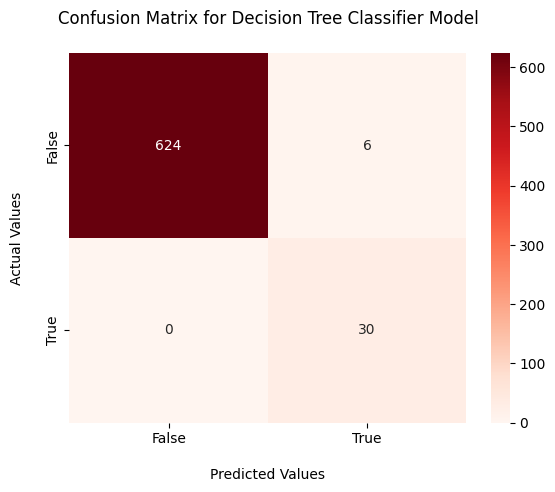

In [40]:
# Plotting confusion matrix
dtc_cm = sns.heatmap(dtc_matrix, annot = True, cmap = 'Reds', fmt="d")

dtc_cm.set_title('Confusion Matrix for Decision Tree Classifier Model\n')
dtc_cm.set_xlabel('\nPredicted Values')
dtc_cm.set_ylabel('Actual Values\n')
dtc_cm.xaxis.set_ticklabels(['False', 'True'])
dtc_cm.yaxis.set_ticklabels(['False', 'True'])
plt.show()

In [41]:
# Generating DT classifier feature importance
feature_importance = {}
for importance, feature_name in zip(dtc.feature_importances_, dtc.feature_names_in_):
    feature_importance[feature_name] = importance

# Adding title
print("DT Classifier Variable Importance\n")

# Sorting feature importance in descending order
sorted_importance = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)

# Display the sorted feature importance 
for feature, importance in sorted_importance:
    print(f"{feature.ljust(20)}: {importance}")

DT Classifier Variable Importance

Rainfall            : 0.8689618465293193
N                   : 0.0845146652127751
Humidity            : 0.04652348825790557
P                   : 0.0
K                   : 0.0
Temperature         : 0.0
pH Value            : 0.0


6.1.2 Random Forest Classifier

In [42]:
# Creating Random Forest Classifier Model
rfc = RandomForestClassifier(random_state=1, max_depth=5, min_samples_split=2, min_samples_leaf=1)

# Fitting the model to the training data (post SMOTE)
rfc.fit(X_train_smote, y_train_smote)

# Making predictions using the testing data
rf_rec = rfc.predict(X_rec_test)
rf_rec

array(['non-rice', 'non-rice', 'non-rice', 'non-rice', 'non-rice',
       'non-rice', 'non-rice', 'non-rice', 'non-rice', 'non-rice',
       'non-rice', 'non-rice', 'non-rice', 'non-rice', 'non-rice',
       'non-rice', 'non-rice', 'non-rice', 'non-rice', 'non-rice',
       'non-rice', 'non-rice', 'non-rice', 'non-rice', 'non-rice',
       'non-rice', 'non-rice', 'non-rice', 'non-rice', 'non-rice',
       'non-rice', 'non-rice', 'non-rice', 'non-rice', 'non-rice',
       'non-rice', 'non-rice', 'non-rice', 'non-rice', 'non-rice',
       'non-rice', 'rice', 'non-rice', 'non-rice', 'non-rice', 'non-rice',
       'non-rice', 'non-rice', 'non-rice', 'non-rice', 'non-rice',
       'non-rice', 'non-rice', 'non-rice', 'non-rice', 'non-rice',
       'non-rice', 'non-rice', 'non-rice', 'non-rice', 'non-rice',
       'non-rice', 'non-rice', 'non-rice', 'non-rice', 'non-rice',
       'non-rice', 'non-rice', 'non-rice', 'non-rice', 'non-rice',
       'non-rice', 'non-rice', 'non-rice', 'non-rice',

In [43]:
# Calculating Accuracy, Precision, Recall and AUC

b1 = accuracy_score(y_rec_test,rf_rec)*100
b2 = precision_score(y_rec_test,rf_rec, pos_label='rice')*100 
b3 = recall_score(y_rec_test,rf_rec, pos_label='rice')*100
b4 = roc_auc_score(y_rec_test.replace({"rice": 1, "non-rice": 0}),pd.Series(rf_rec).replace({"rice":1, "non-rice":0}))

print('RF Classifier Evaluation Scores\n')
print('Accuracy score   :', accuracy_score(y_rec_test,rf_rec)*100)
print('Precision score  :', precision_score(y_rec_test,rf_rec, pos_label='rice')*100)
print('Recall score     :', recall_score(y_rec_test,rf_rec, pos_label='rice')*100)
print('AUC score        :', roc_auc_score(y_rec_test.replace({"rice": 1, "non-rice": 0}),pd.Series(rf_rec).replace({"rice":1, "non-rice":0})))

RF Classifier Evaluation Scores

Accuracy score   : 99.69696969696969
Precision score  : 93.75
Recall score     : 100.0
AUC score        : 0.9984126984126984


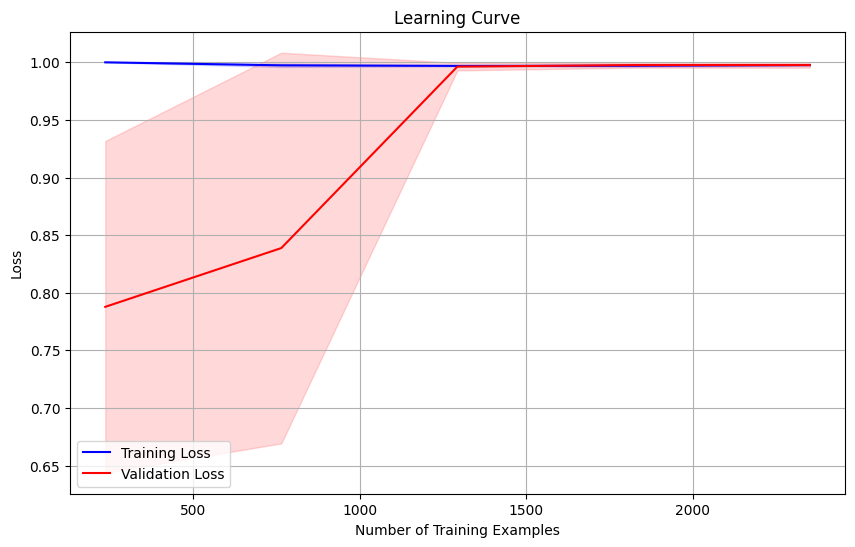

In [87]:
# Compute learning curve data
train_sizes, train_scores, test_scores = learning_curve(rfc, X_train_smote, y_train_smote, cv=5, train_sizes=np.linspace(0.1, 1.0, 5))

# Calculate mean and standard deviation of train and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Loss', color='blue')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, label='Validation Loss', color='red')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15, color='red')

plt.xlabel('Number of Training Examples')
plt.ylabel('Loss')
plt.title('Learning Curve')
plt.legend()
plt.grid()
plt.show()

No signs of overfitting in the RF classifier model, as the validation loss curve is similar to the training loss curve around 1250 iterations onwards.

In [44]:
# Generating confusion Matrix

rfc_matrix = confusion_matrix(y_rec_test,rf_rec)
rfc_matrix

array([[628,   2],
       [  0,  30]], dtype=int64)

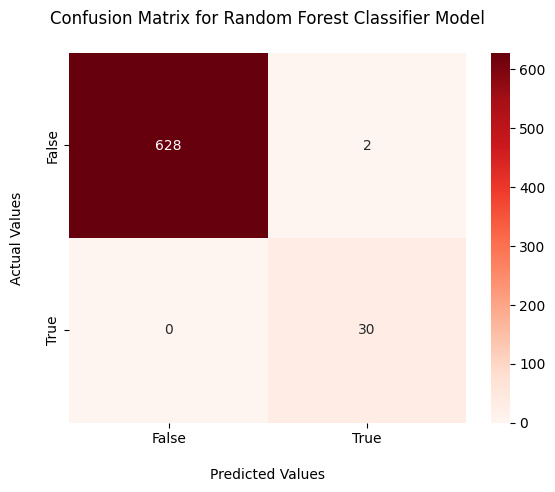

In [45]:
# Plotting confusion matrix
rfc_cm = sns.heatmap(rfc_matrix, annot = True, cmap = 'Reds', fmt="d")

rfc_cm.set_title('Confusion Matrix for Random Forest Classifier Model\n')
rfc_cm.set_xlabel('\nPredicted Values')
rfc_cm.set_ylabel('Actual Values\n')
rfc_cm.xaxis.set_ticklabels(['False', 'True'])
rfc_cm.yaxis.set_ticklabels(['False', 'True'])
plt.show()

In [46]:
# Generating RF classifier feature importance
feature_importance = {}
for importance, feature_name in zip(rfc.feature_importances_, rfc.feature_names_in_):
    feature_importance[feature_name] = importance

# Adding title
print("RF Classifier Variable Importance\n")

# Sorting feature importance in descending order
sorted_importance = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)

# Display the sorted feature importance 
for feature, importance in sorted_importance:
    print(f"{feature.ljust(20)}: {importance}")

RF Classifier Variable Importance

Rainfall            : 0.4301563773034695
N                   : 0.16872080413229254
Humidity            : 0.16420263159633147
K                   : 0.15520098980925365
P                   : 0.04564027020016132
Temperature         : 0.03533122467529981
pH Value            : 0.0007477022831918137


6.1.3 Gradient-boosted Tree Classfier

In [47]:
# Creating Gradient-boosted Tree Classifier Model
gbc = GradientBoostingClassifier(random_state=1, max_depth=5, min_samples_split=2, min_samples_leaf=1, learning_rate=0.01)

# Fitting the model to the training data
gbc.fit(X_train_smote, y_train_smote)

# Making predictions using the testing data
gbt_rec = gbc.predict(X_rec_test)
gbt_rec

array(['non-rice', 'non-rice', 'non-rice', 'non-rice', 'non-rice',
       'non-rice', 'non-rice', 'non-rice', 'non-rice', 'non-rice',
       'non-rice', 'non-rice', 'non-rice', 'non-rice', 'non-rice',
       'non-rice', 'non-rice', 'non-rice', 'non-rice', 'non-rice',
       'non-rice', 'non-rice', 'non-rice', 'non-rice', 'non-rice',
       'non-rice', 'non-rice', 'non-rice', 'non-rice', 'non-rice',
       'non-rice', 'non-rice', 'non-rice', 'non-rice', 'non-rice',
       'non-rice', 'non-rice', 'non-rice', 'non-rice', 'non-rice',
       'non-rice', 'rice', 'non-rice', 'non-rice', 'non-rice', 'non-rice',
       'non-rice', 'non-rice', 'non-rice', 'non-rice', 'non-rice',
       'non-rice', 'non-rice', 'non-rice', 'non-rice', 'non-rice',
       'non-rice', 'non-rice', 'non-rice', 'non-rice', 'non-rice',
       'non-rice', 'non-rice', 'non-rice', 'non-rice', 'non-rice',
       'non-rice', 'non-rice', 'non-rice', 'non-rice', 'non-rice',
       'non-rice', 'non-rice', 'non-rice', 'non-rice',

In [48]:
# Calculating Accuracy, Precision, Recall and AUC

c1 = accuracy_score(y_rec_test,gbt_rec)*100
c2 = precision_score(y_rec_test,gbt_rec, pos_label='rice')*100 
c3 = recall_score(y_rec_test,gbt_rec, pos_label='rice')*100
c4 = roc_auc_score(y_rec_test.replace({"rice": 1, "non-rice": 0}),pd.Series(gbt_rec).replace({"rice":1, "non-rice":0}))

print('GBT Classifier Evaluation Scores\n')
print('Accuracy score   :', accuracy_score(y_rec_test,gbt_rec)*100)
print('Precision score  :', precision_score(y_rec_test,gbt_rec, pos_label='rice')*100)
print('Recall score     :', recall_score(y_rec_test,gbt_rec, pos_label='rice')*100)
print('AUC score        :', roc_auc_score(y_rec_test.replace({"rice": 1, "non-rice": 0}),pd.Series(gbt_rec).replace({"rice":1, "non-rice":0})))

GBT Classifier Evaluation Scores

Accuracy score   : 99.69696969696969
Precision score  : 93.75
Recall score     : 100.0
AUC score        : 0.9984126984126984


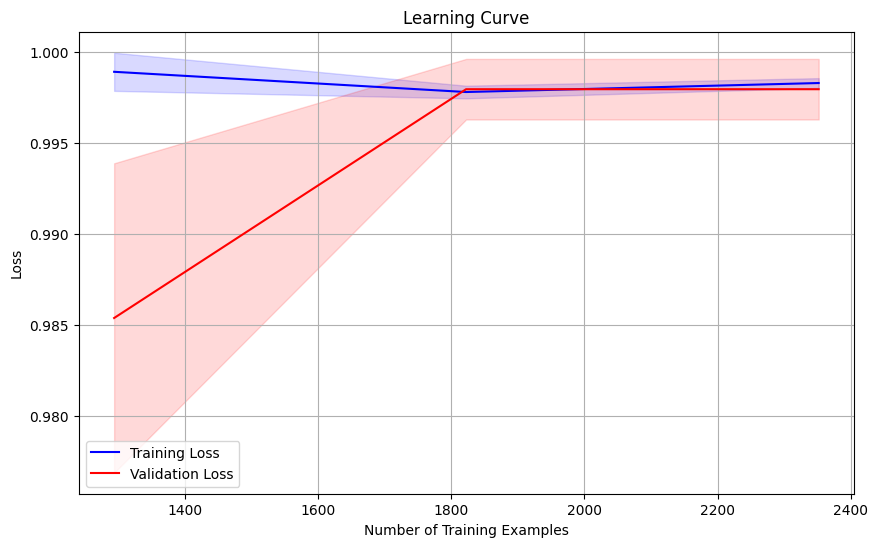

In [88]:
# Compute learning curve data
train_sizes, train_scores, test_scores = learning_curve(gbc, X_train_smote, y_train_smote, cv=5, train_sizes=np.linspace(0.1, 1.0, 5))

# Calculate mean and standard deviation of train and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Loss', color='blue')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, label='Validation Loss', color='red')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15, color='red')

plt.xlabel('Number of Training Examples')
plt.ylabel('Loss')
plt.title('Learning Curve')
plt.legend()
plt.grid()
plt.show()

Some slight signs of underfitting in the GBT classifier model but not very significant and can be negligible, since the validation loss curve sits slightly below the training loss curve after 2000 iterations onwards. 

In [49]:
# Generating confusion Matrix

gbc_matrix = confusion_matrix(y_rec_test,gbt_rec)
gbc_matrix

array([[628,   2],
       [  0,  30]], dtype=int64)

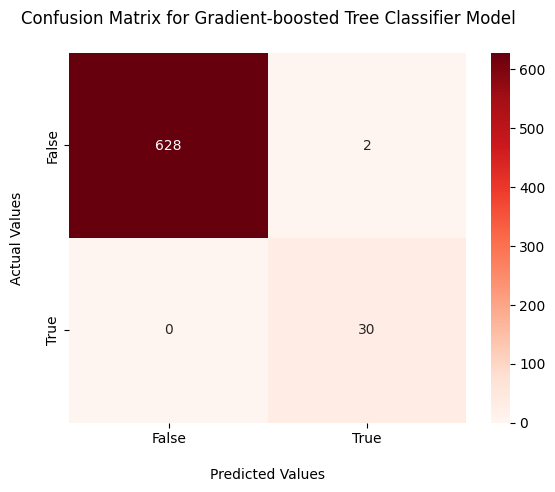

In [50]:
# Plotting confusion matrix
gbc_cm = sns.heatmap(gbc_matrix, annot = True, cmap = 'Reds', fmt="d")

gbc_cm.set_title('Confusion Matrix for Gradient-boosted Tree Classifier Model\n')
gbc_cm.set_xlabel('\nPredicted Values')
gbc_cm.set_ylabel('Actual Values\n')
gbc_cm.xaxis.set_ticklabels(['False', 'True'])
gbc_cm.yaxis.set_ticklabels(['False', 'True'])
plt.show()

In [51]:
# Generating GBT classifier feature importance
feature_importance = {}
for importance, feature_name in zip(gbc.feature_importances_, gbc.feature_names_in_):
    feature_importance[feature_name] = importance

# Adding title
print("GBT Classifier Variable Importance\n")

# Sorting feature importance in descending order
sorted_importance = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)

# Display the sorted feature importance 
for feature, importance in sorted_importance:
    print(f"{feature.ljust(20)}: {importance}")


GBT Classifier Variable Importance

Rainfall            : 0.8607414218364756
N                   : 0.08370369383232942
Humidity            : 0.055554884331189776
Temperature         : 3.3891269773897157e-15
pH Value            : 1.4059605858279621e-15
K                   : 2.818882042116696e-16
P                   : 5.974874394251206e-17


6.1.4 Tree-based Classifier Models Comparison

In [52]:
# Creating table of comparion for all tree-based classifier models performances

# Defining list of data 
data1 = {'Tree-based Classifier Models':['Decision Tree Classifier', 'Random Forest Classifier', 'Gradient-boosted Tree Classifier'],
        'Accuracy':[a1, b1, c1],
        'Precision':[a2, b2, c2],
        'Recall':[a3, b3, c3],
        'AUC':[a4, b4, c4]}
 
# Display table of comparison
df1 = pd.DataFrame(data1)
df1

,Tree-based Classifier Models,Accuracy,Precision,Recall,AUC
0,Decision Tree Classifier,99.090909,83.333333,100.0,0.995238
1,Random Forest Classifier,99.696970,93.750000,100.0,0.998413
2,Gradient-boosted Tree Classifier,99.696970,93.750000,100.0,0.998413


As all 3 tree-based classifer models performed exceptionally well (with accuracies of nearly 100%), the classifer models will not be subjected to hyperparameter tuning.
RF and GBT Classifier also had identical evaluation scores but not similar variable importances.

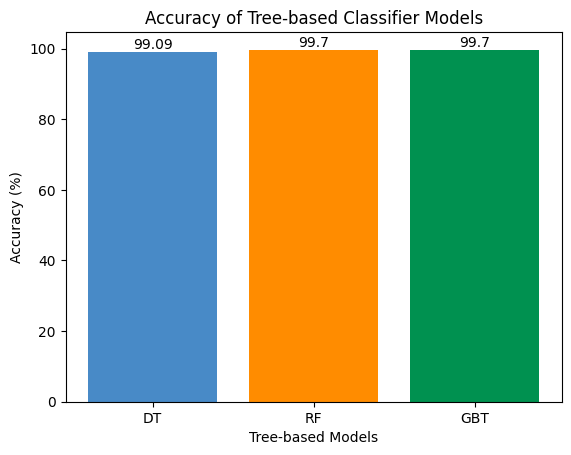

In [53]:
# Plotting performance comparison for all tree-based classifier models 

# Defining list of data 
Algorithms = ['DT', 'RF', 'GBT']
Accuracy = [a1, b1, c1]

x_pos = np.arange(len(Accuracy))

# Plotting bar charts with different colors
plt.bar(x_pos, Accuracy, color=['#488AC7','#ff8c00','#009150'])
plt.xticks(x_pos, Algorithms)
plt.ylabel('Accuracy (%)')
plt.xlabel('Tree-based Models')
plt.title('Accuracy of Tree-based Classifier Models')

# Adding labels to the bars
for i, v in enumerate(Accuracy):
    plt.text(i, v, str(round(v, 2)), ha='center', va='bottom')

# Display plot
plt.show()

Best performing classifier model = RF (based on feature importance & model fitness) -> optimal model candidate to be deployed for recommending rice cultivation suitability in the system.


### 6.2 Rice Yield Prediction

6.2.1 Decision Tree Regressor

In [54]:
# Creating Decision Tree Regressor Model
dtr = DecisionTreeRegressor(random_state=1, max_depth=5, min_samples_split=2 , min_samples_leaf=1, ccp_alpha=0.01)

# Fitting the model to the training data
dtr.fit(X_pred_train, y_pred_train)

# Making predictions using the testing data
dt_pred = dtr.predict(X_pred_test)
dt_pred

array([27000.        , 44166.66666667, 12400.        , 28250.        ,
       32836.70967742, 46000.        , 32836.70967742, 49000.        ,
       45000.        , 32836.70967742, 27000.        , 32836.70967742,
       32836.70967742, 27000.        , 32836.70967742, 32836.70967742,
       32836.70967742, 32836.70967742, 45000.        , 44166.66666667,
       32836.70967742])

In [55]:
# Calculating RMSE, MAPE and R^2

d1 = np.sqrt(mean_squared_error(y_pred_test,dt_pred))
d2 = mean_absolute_percentage_error(y_pred_test,dt_pred)*100
d3 = r2_score(y_pred_test,dt_pred)

print('DT Regressor Evaluation Scores\n')
print('RMSE     :', np.sqrt(mean_squared_error(y_pred_test,dt_pred)))
print('MAPE     :', mean_absolute_percentage_error(y_pred_test,dt_pred)*100)
print('R-square :', r2_score(y_pred_test,dt_pred))

DT Regressor Evaluation Scores

RMSE     : 3675.7119940373414
MAPE     : 8.72799626386888
R-square : 0.827219421713322


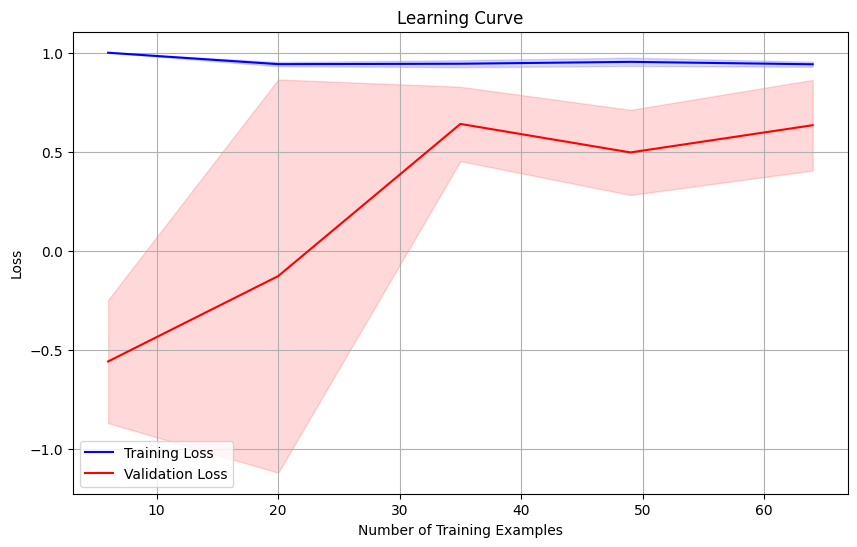

In [89]:
# Compute learning curve data
train_sizes, train_scores, test_scores = learning_curve(dtr, X_pred_train, y_pred_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 5))

# Calculate mean and standard deviation of train and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Loss', color='blue')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, label='Validation Loss', color='red')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15, color='red')

plt.xlabel('Number of Training Examples')
plt.ylabel('Loss')
plt.title('Learning Curve')
plt.legend()
plt.grid()
plt.show()

In [56]:
# Generating DT regressor feature importance
feature_importance = {}
for importance, feature_name in zip(dtr.feature_importances_, dtr.feature_names_in_):
    feature_importance[feature_name] = importance

# Adding title
print("DT Regressor Variable Importance\n")

# Sorting feature importance in descending order
sorted_importance = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)

# Display the sorted feature importance 
for feature, importance in sorted_importance:
    print(f"{feature.ljust(20)}: {importance}")

DT Regressor Variable Importance

Planted Area        : 0.8116216901013088
Temperature         : 0.09630797366131691
Rainfall            : 0.09207033623737428


6.2.2 Random Forest Regressor

In [57]:
# Creating Random Forest Regressor Model
rfr = RandomForestRegressor(random_state=1, max_depth=5, min_samples_split=2 , min_samples_leaf=1)

# Fitting the model to the training data
rfr.fit(X_pred_train, y_pred_train)

# Making predictions using the testing data
rf_pred = rfr.predict(X_pred_test)
rf_pred

array([27432.82280889, 42170.15903628, 13286.83984127, 28217.38865305,
       28948.31256565, 44818.77185575, 33381.9783062 , 46523.31390885,
       43311.65180488, 34008.98589638, 28338.77180085, 33728.58789453,
       29886.21696518, 28090.1023327 , 33745.0651045 , 29574.86692707,
       33613.55293492, 33125.5018916 , 46000.71132372, 39796.17784554,
       29223.56169264])

In [58]:
# Calculating RMSE, MAPE and R^2

e1 = np.sqrt(mean_squared_error(y_pred_test,rf_pred))
e2 = mean_absolute_percentage_error(y_pred_test,rf_pred)*100
e3 = r2_score(y_pred_test,rf_pred)

print('RF Regressor Evaluation Scores\n')
print('RMSE     :', np.sqrt(mean_squared_error(y_pred_test,rf_pred)))
print('MAPE     :', mean_absolute_percentage_error(y_pred_test,rf_pred)*100)
print('R-square :', r2_score(y_pred_test,rf_pred))

RF Regressor Evaluation Scores

RMSE     : 3158.095938468074
MAPE     : 6.639776655029508
R-square : 0.8724552430273228


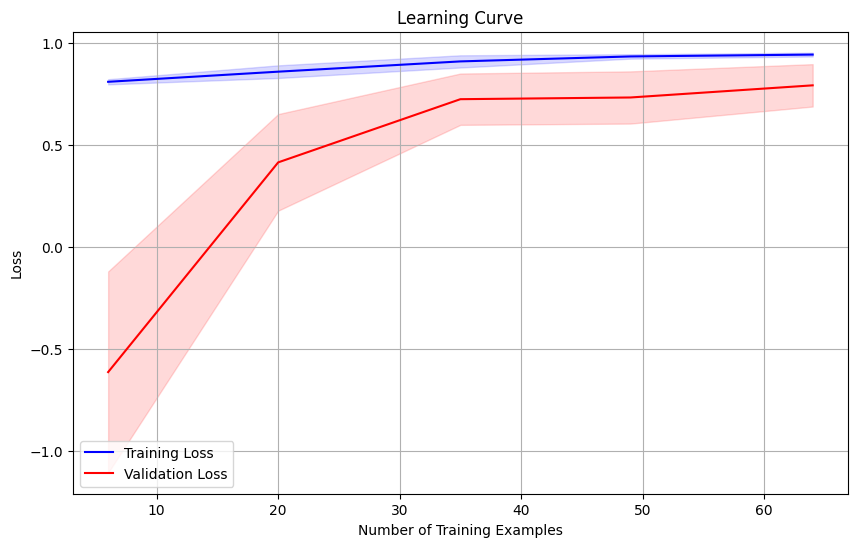

In [90]:
# Compute learning curve data
train_sizes, train_scores, test_scores = learning_curve(rfr, X_pred_train, y_pred_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 5))

# Calculate mean and standard deviation of train and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Loss', color='blue')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, label='Validation Loss', color='red')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15, color='red')

plt.xlabel('Number of Training Examples')
plt.ylabel('Loss')
plt.title('Learning Curve')
plt.legend()
plt.grid()
plt.show()

In [59]:
# Generating RF regressor feature importance
feature_importance = {}
for importance, feature_name in zip(rfr.feature_importances_, rfr.feature_names_in_):
    feature_importance[feature_name] = importance

# Adding title
print("RF Regressor Variable Importance\n")

# Sorting feature importance in descending order
sorted_importance = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)

# Display the sorted feature importance 
for feature, importance in sorted_importance:
    print(f"{feature.ljust(20)}: {importance}")

RF Regressor Variable Importance

Planted Area        : 0.8321844560069991
Temperature         : 0.09078875000447915
Rainfall            : 0.07702679398852172


6.2.3 Gradient-boosted Tree Regressor

In [60]:
# Creating Gradient-boosted Tree Regressor Model
gbr = GradientBoostingRegressor(random_state=1, max_depth=5, min_samples_split=2 , min_samples_leaf=1, learning_rate=0.01)

# Fitting the model to the training data
gbr.fit(X_pred_train, y_pred_train)

# Making predictions using the testing data
gbt_pred = gbr.predict(X_pred_test)
gbt_pred

array([30972.57686953, 40425.3922014 , 22851.36536063, 31732.2872518 ,
       31188.27426774, 43080.22864473, 34797.11608404, 44621.207398  ,
       42446.260986  , 35335.08867968, 31219.75728609, 35141.74997902,
       32468.34785056, 31843.73249882, 35141.74997902, 31188.27426774,
       36753.85141925, 36753.85141925, 42446.260986  , 40425.3922014 ,
       31188.27426774])

In [61]:
# Calculating RMSE, MAPE and R^2

f1 = np.sqrt(mean_squared_error(y_pred_test,gbt_pred))
f2 = mean_absolute_percentage_error(y_pred_test,gbt_pred)*100
f3 = r2_score(y_pred_test,gbt_pred)

print('GBT Regressor Evaluation Scores\n')
print('RMSE     :', np.sqrt(mean_squared_error(y_pred_test,gbt_pred)))
print('MAPE     :', mean_absolute_percentage_error(y_pred_test,gbt_pred)*100)
print('R-square :', r2_score(y_pred_test,gbt_pred))

GBT Regressor Evaluation Scores

RMSE     : 4282.7770703319475
MAPE     : 13.370607979522728
R-square : 0.7654351622872444


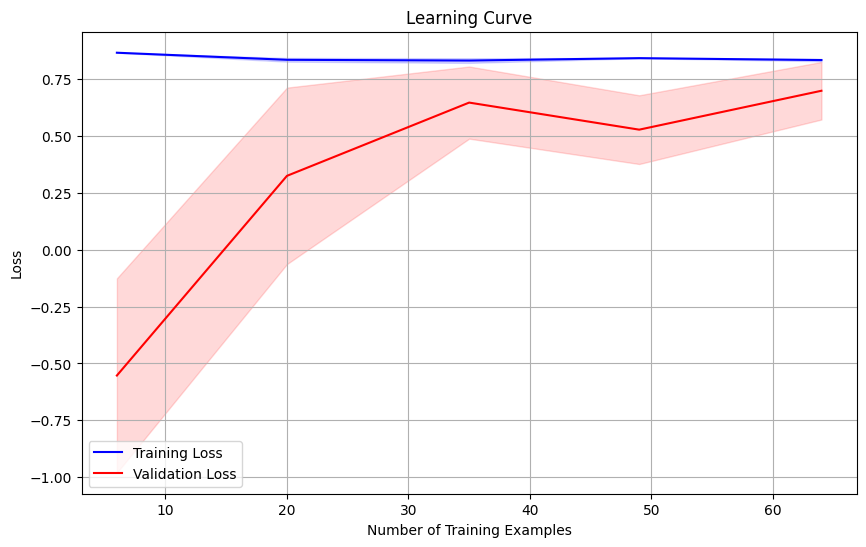

In [91]:
# Compute learning curve data
train_sizes, train_scores, test_scores = learning_curve(gbr, X_pred_train, y_pred_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 5))

# Calculate mean and standard deviation of train and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Loss', color='blue')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, label='Validation Loss', color='red')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15, color='red')

plt.xlabel('Number of Training Examples')
plt.ylabel('Loss')
plt.title('Learning Curve')
plt.legend()
plt.grid()
plt.show()

In [62]:
# Generating GBT regressor feature importance
feature_importance = {}
for importance, feature_name in zip(gbr.feature_importances_, gbr.feature_names_in_):
    feature_importance[feature_name] = importance

# Adding title
print("GBT Regressor Variable Importance\n")

# Sorting feature importance in descending order
sorted_importance = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)

# Display the sorted feature importance 
for feature, importance in sorted_importance:
    print(f"{feature.ljust(20)}: {importance}")

GBT Regressor Variable Importance

Planted Area        : 0.8379264737486416
Temperature         : 0.10344989699313205
Rainfall            : 0.05862362925822635


6.2.4 Tree-based Regressor Models Comparison

In [63]:
# Creating table of comparion for all tree-based regressor models performances

# Defining list of data 
data2 = {'Tree-based Regressor Models':['Decision Tree Regressor', 'Random Forest Regressor', 'Gradient-boosted Tree Regressor'],
        'RMSE':[d1, e1, f1],
        'MAPE (%)': [d2, e2, f2],
        'R-Square':[d3, e3, f3]}
 
# Display table of comparison
df2 = pd.DataFrame(data2)
df2

,Tree-based Regressor Models,RMSE,MAPE (%),R-Square
0,Decision Tree Regressor,3675.711994,8.727996,0.827219
1,Random Forest Regressor,3158.095938,6.639777,0.872455
2,Gradient-boosted Tree Regressor,4282.777070,13.370608,0.765435


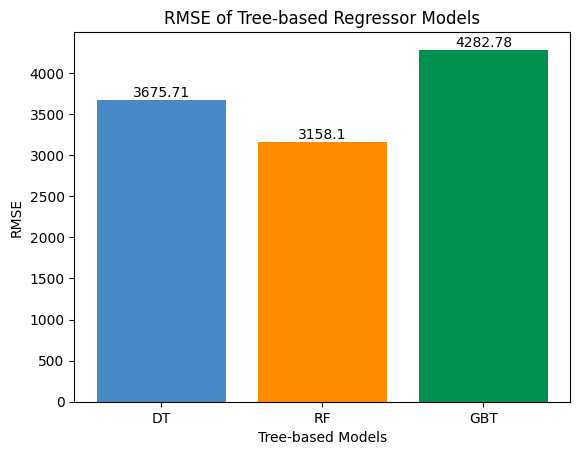

In [64]:
# Plotting performance comparison for all tree-based regressor models 

# Defining list of data
Algorithms = ['DT', 'RF', 'GBT']
RMSE = [d1, e1, f1]

x_pos = np.arange(len(RMSE))

# Plotting bar charts with different colors
plt.bar(x_pos, RMSE, color=['#488AC7', '#ff8c00', '#009150'])
plt.xticks(x_pos, Algorithms)
plt.ylabel('RMSE')
plt.xlabel('Tree-based Models')
plt.title('RMSE of Tree-based Regressor Models')

# Adding labels to the bars
for i, v in enumerate(RMSE):
    plt.text(i, v, str(round(v, 2)), ha='center', va='bottom')

# Display plot
plt.show()

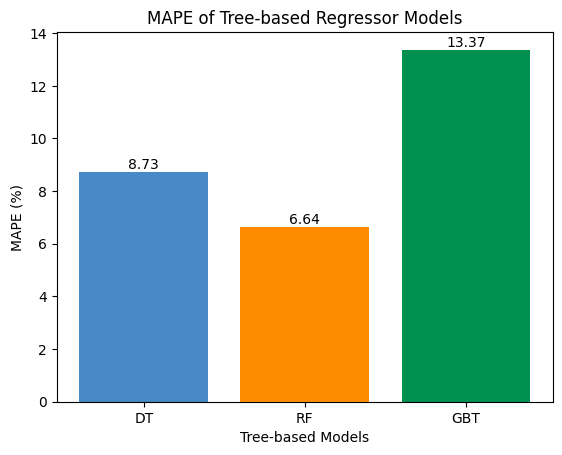

In [65]:
# Plotting performance comparison for all tree-based regressor models 

# Defining list of data 
Algorithms = ['DT', 'RF', 'GBT']
MAPE = [d2, e2, f2]

x_pos = np.arange(len(MAPE))

# Plotting bar charts with different colors
plt.bar(x_pos, MAPE, color=['#488AC7','#ff8c00','#009150'])
plt.xticks(x_pos, Algorithms)
plt.ylabel('MAPE (%)')
plt.xlabel('Tree-based Models')
plt.title('MAPE of Tree-based Regressor Models')

# Adding labels to the bars
for i, v in enumerate(MAPE):
    plt.text(i, v, str(round(v, 2)), ha='center', va='bottom')

# Display plot
plt.show()

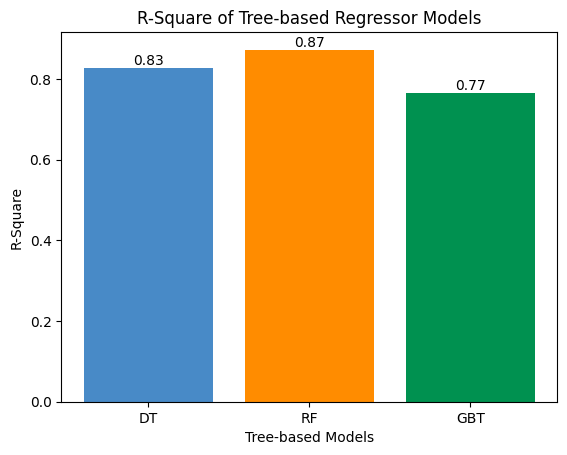

In [66]:
# Plotting performance comparison for all tree-based regressor models 

# Defining list of data 
Algorithms = ['DT', 'RF', 'GBT']
R_Square = [d3, e3, f3]

x_pos = np.arange(len(R_Square))

# Plotting bar charts with different colors
plt.bar(x_pos, R_Square, color=['#488AC7','#ff8c00','#009150'])
plt.xticks(x_pos, Algorithms)
plt.ylabel('R-Square')
plt.xlabel('Tree-based Models')
plt.title('R-Square of Tree-based Regressor Models')

# Adding labels to the bars
for i, v in enumerate(R_Square):
    plt.text(i, v, str(round(v, 2)), ha='center', va='bottom')

# Display plot
plt.show()

6.2.5 Hyperparameter tuning

In [67]:
# Hyperparameters tuning via grid search CV for DT regressor

# Setting seed
set_seed(10)

# Defining the grid search hyperparameters
param_grid1 = {'max_depth': [5, 10, 15, 20],  
              'min_samples_split': [2, 4, 6, 8, 10], 
              'min_samples_leaf':[1, 2, 3, 4, 5],
              'ccp_alpha': [0.01, 0.05, 0.1]} 

# Grid search
grid1 = GridSearchCV(DecisionTreeRegressor(random_state=1), param_grid1, refit = True, verbose = 3, n_jobs=-1, cv=10) 
grid_result1 = grid1.fit(X_pred_train, y_pred_train)

# Printing the best hyperparameters
print("Best Hyperparameters:", grid_result1.best_params_)


Fitting 10 folds for each of 300 candidates, totalling 3000 fits
Best Hyperparameters: {'ccp_alpha': 0.01, 'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 10}


In [68]:
# Hyperparameters tuning via grid search CV for RF regressor

# Setting seed
set_seed(10)

# Defining the grid search hyperparameters
param_grid2 = {'max_depth': [5, 10, 15, 20],  
              'min_samples_split': [2, 4, 6, 8, 10], 
              'min_samples_leaf':[1, 2, 3, 4, 5]} 

# Grid search
grid2 = GridSearchCV(RandomForestRegressor(random_state=1), param_grid2, refit = True, verbose = 3, n_jobs=-1, cv=10) 
grid_result2 = grid2.fit(X_pred_train, y_pred_train)

# Printing the best hyperparameters
print("Best Hyperparameters:", grid_result2.best_params_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


Best Hyperparameters: {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [69]:
# Hyperparameters tuning via grid search CV for GBT regressor

# Setting seed
set_seed(10)

# Defining the grid search hyperparameters
param_grid3 = {'max_depth': [5, 10, 15, 20],  
              'min_samples_split': [2, 4, 6, 8, 10], 
              'min_samples_leaf':[1, 2, 3, 4, 5],
              'learning_rate': [0.01, 0.05, 0.1]} 

# Grid search
grid3 = GridSearchCV(GradientBoostingRegressor(random_state=1), param_grid3, refit = True, verbose = 3, n_jobs=-1, cv=10) 
grid_result3 = grid3.fit(X_pred_train, y_pred_train)

# Printing the best hyperparameters
print("Best Hyperparameters:", grid_result3.best_params_)

Fitting 10 folds for each of 300 candidates, totalling 3000 fits


Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}


6.2.6 Tuned DT Regressor

In [70]:
# Re-training Decision Tree Regressor Model
tuned_dtr = DecisionTreeRegressor(random_state=1, max_depth=10, min_samples_split=10, min_samples_leaf=3, ccp_alpha=0.01)

# Fitting the model to the training data
tuned_dtr.fit(X_pred_train, y_pred_train)

# Making predictions using the testing data
tuned_dt_pred = tuned_dtr.predict(X_pred_test)
tuned_dt_pred

array([27833.33333333, 42494.25      , 13062.5       , 27833.33333333,
       26206.5       , 47166.66666667, 28107.22222222, 47166.66666667,
       47166.66666667, 28107.22222222, 27833.33333333, 28107.22222222,
       26206.5       , 27833.33333333, 28107.22222222, 26206.5       ,
       40681.6       , 40681.6       , 47166.66666667, 42494.25      ,
       26206.5       ])

In [71]:
# Calculating RMSE, MAPE and R^2

g1 = np.sqrt(mean_squared_error(y_pred_test,tuned_dt_pred))
g2 = mean_absolute_percentage_error(y_pred_test,tuned_dt_pred)*100
g3 = r2_score(y_pred_test,tuned_dt_pred)

print('DT Regressor Evaluation Scores\n')
print('RMSE     :', np.sqrt(mean_squared_error(y_pred_test,tuned_dt_pred)))
print('MAPE     :', mean_absolute_percentage_error(y_pred_test,tuned_dt_pred)*100)
print('R-square :', r2_score(y_pred_test,tuned_dt_pred))

DT Regressor Evaluation Scores

RMSE     : 3750.189078430972
MAPE     : 7.377048568581432
R-square : 0.8201467451455874


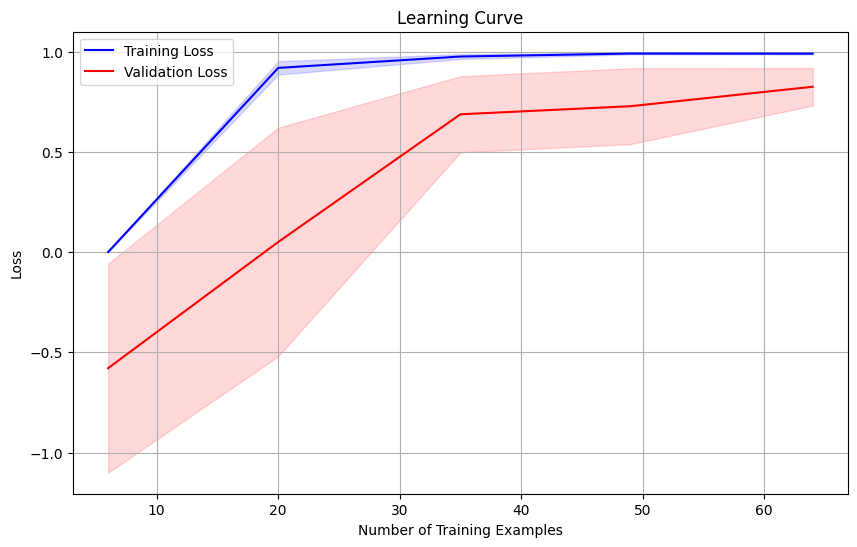

In [92]:
# Compute learning curve data
train_sizes, train_scores, test_scores = learning_curve(tuned_dtr, X_pred_train, y_pred_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 5))

# Calculate mean and standard deviation of train and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Loss', color='blue')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, label='Validation Loss', color='red')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15, color='red')

plt.xlabel('Number of Training Examples')
plt.ylabel('Loss')
plt.title('Learning Curve')
plt.legend()
plt.grid()
plt.show()

No signs of overfitting in the DT regresoor model (after hyperparameter tuning) as the difference between validation & training loss curve constantly reduces over time.

In [72]:
# Generating tuned DT regressor feature importance
feature_importance = {}
for importance, feature_name in zip(tuned_dtr.feature_importances_, tuned_dtr.feature_names_in_):
    feature_importance[feature_name] = importance

# Adding title
print("Tuned DT Regressor Variable Importance\n")

# Sorting feature importance in descending order
sorted_importance = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)

# Display the sorted feature importance 
for feature, importance in sorted_importance:
    print(f"{feature.ljust(20)}: {importance}")

Tuned DT Regressor Variable Importance

Planted Area        : 0.8331620504304802
Temperature         : 0.10460957830431049
Rainfall            : 0.062228371265209435


6.2.7 Tuned RF Regressor

In [73]:
# Re-training Random Forest Regressor Model
tuned_rfr = RandomForestRegressor(random_state=1, max_depth=15, min_samples_split=2, min_samples_leaf=2)

# Fitting the model to the training data
tuned_rfr.fit(X_pred_train, y_pred_train)

# Making predictions using the testing data
tuned_rf_pred = tuned_rfr.predict(X_pred_test)
tuned_rf_pred

array([26777.65380952, 43747.45430952, 13465.98333333, 27523.72571429,
       26236.43129762, 45444.63559163, 31102.00680159, 46978.05230592,
       42966.29246032, 32074.3912381 , 28250.41666667, 30216.31986111,
       25072.59416667, 27634.87838095, 30884.43200397, 27037.49913095,
       37777.95988095, 36394.43536905, 47267.57027778, 40553.65240476,
       27666.36354762])

In [74]:
# Calculating RMSE, MAPE and R^2

h1 = np.sqrt(mean_squared_error(y_pred_test,tuned_rf_pred))
h2 = mean_absolute_percentage_error(y_pred_test,tuned_rf_pred)*100
h3 = r2_score(y_pred_test,tuned_rf_pred)

print('RF Regressor Evaluation Scores\n')
print('RMSE     :', np.sqrt(mean_squared_error(y_pred_test,tuned_rf_pred)))
print('MAPE     :', mean_absolute_percentage_error(y_pred_test,tuned_rf_pred)*100)
print('R-square :', r2_score(y_pred_test,tuned_rf_pred))

RF Regressor Evaluation Scores

RMSE     : 2998.2702271421754
MAPE     : 5.914872188364228
R-square : 0.8850382101270751


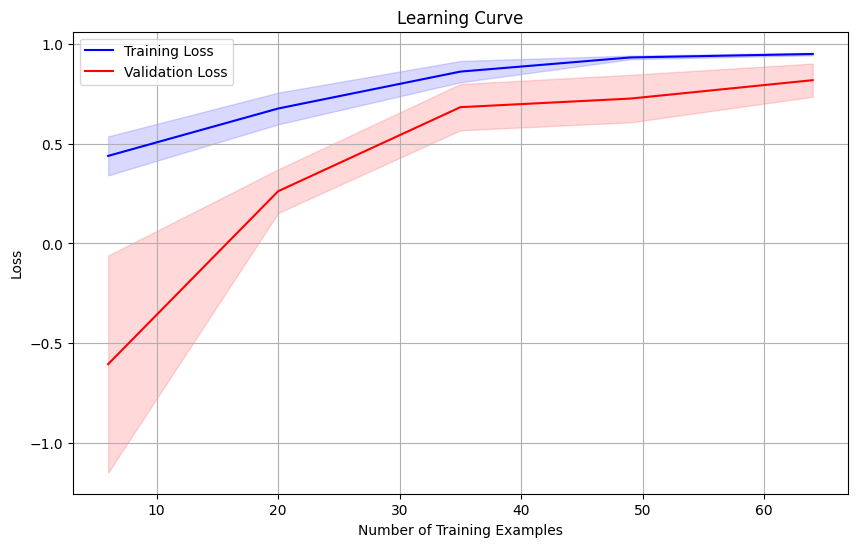

In [93]:
# Compute learning curve data
train_sizes, train_scores, test_scores = learning_curve(tuned_rfr, X_pred_train, y_pred_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 5))

# Calculate mean and standard deviation of train and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Loss', color='blue')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, label='Validation Loss', color='red')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15, color='red')

plt.xlabel('Number of Training Examples')
plt.ylabel('Loss')
plt.title('Learning Curve')
plt.legend()
plt.grid()
plt.show()

No signs of overfitting in the RF regresoor model (after hyperparameter tuning) as the difference between validation & training loss curve constantly reduces over time, with even smaller differences

In [75]:
# Generating tuned RF regressor feature importance
feature_importance = {}
for importance, feature_name in zip(tuned_rfr.feature_importances_, tuned_rfr.feature_names_in_):
    feature_importance[feature_name] = importance

# Adding title
print("Tuned RF Regressor Variable Importance\n")

# Sorting feature importance in descending order
sorted_importance = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)

# Display the sorted feature importance 
for feature, importance in sorted_importance:
    print(f"{feature.ljust(20)}: {importance}")

Tuned RF Regressor Variable Importance

Planted Area        : 0.8115738458558004
Temperature         : 0.1021388480041404
Rainfall            : 0.08628730614005913


6.2.8 Tuned GBT Regressor

In [76]:
# Re-training Gradient-boosted Tree Regressor Model
tuned_gbr = GradientBoostingRegressor(random_state=1, max_depth=10, min_samples_split=2, min_samples_leaf=1, learning_rate=0.1)

# Fitting the model to the training data
tuned_gbr.fit(X_pred_train, y_pred_train)

# Making predictions using the testing data
tuned_gbt_pred = tuned_gbr.predict(X_pred_test)
tuned_gbt_pred

array([27000.29279128, 45634.76766123, 12001.25066343, 28479.03110113,
       24765.87801805, 45999.7881247 , 31107.41601878, 48367.15329678,
       44999.8146861 , 29432.62264085, 27000.29279128, 30358.13187424,
       28022.71012748, 28172.59615551, 30463.65921497, 24765.87801805,
       39191.55793202, 38929.13165359, 44999.8146861 , 43109.43985316,
       26014.36748287])

In [77]:
# Calculating RMSE, MAPE and R^2

i1 = np.sqrt(mean_squared_error(y_pred_test,tuned_gbt_pred))
i2 = mean_absolute_percentage_error(y_pred_test,tuned_gbt_pred)*100
i3 = r2_score(y_pred_test,tuned_gbt_pred)

print('GBT Regressor Evaluation Scores\n')
print('RMSE     :', np.sqrt(mean_squared_error(y_pred_test,tuned_gbt_pred)))
print('MAPE     :', mean_absolute_percentage_error(y_pred_test,tuned_gbt_pred)*100)
print('R-square :', r2_score(y_pred_test,tuned_gbt_pred))

GBT Regressor Evaluation Scores

RMSE     : 2834.744256783656
MAPE     : 5.681895904637792
R-square : 0.8972362981259706


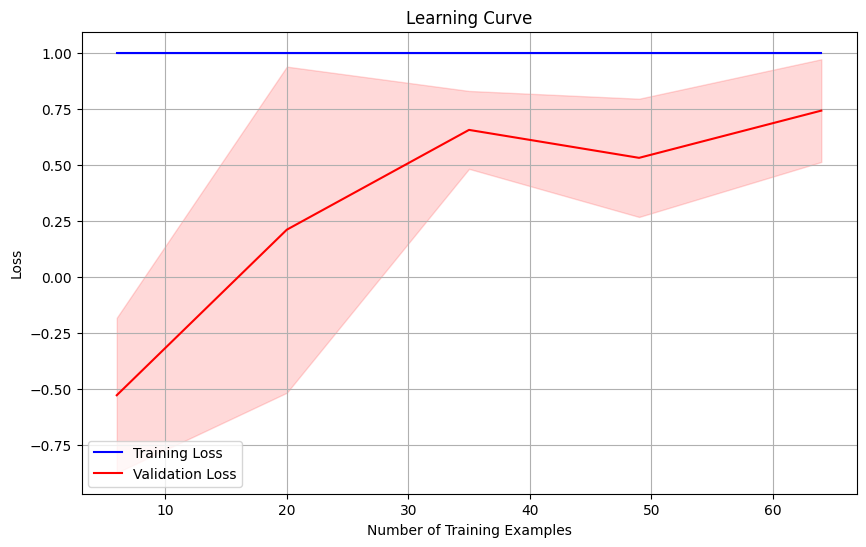

In [94]:
# Compute learning curve data
train_sizes, train_scores, test_scores = learning_curve(tuned_gbr, X_pred_train, y_pred_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 5))

# Calculate mean and standard deviation of train and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Loss', color='blue')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, label='Validation Loss', color='red')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15, color='red')

plt.xlabel('Number of Training Examples')
plt.ylabel('Loss')
plt.title('Learning Curve')
plt.legend()
plt.grid()
plt.show()

The GBT regresoor model (after hyperparameter tuning) is some what underfitted as the difference in validation loss & training loss curve is more significant as compared to its counterparts.

In [78]:
# Generating tuned GBT regressor feature importance
feature_importance = {}
for importance, feature_name in zip(tuned_gbr.feature_importances_, tuned_gbr.feature_names_in_):
    feature_importance[feature_name] = importance

# Adding title
print("Tuned GBT Regressor Variable Importance\n")

# Sorting feature importance in descending order
sorted_importance = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)

# Display the sorted feature importance 
for feature, importance in sorted_importance:
    print(f"{feature.ljust(20)}: {importance}")

Tuned GBT Regressor Variable Importance

Planted Area        : 0.8297570082853599
Temperature         : 0.10573379727808778
Rainfall            : 0.0645091944365522


6.2.9 Tuned Tree-based Regressor Models Comparison

In [79]:
# Creating table of comparion for all tree-based regressor models performances

# Defining list of data 
data3 = {'Tree-based Regressor Models':['Tuned Decision Tree Regressor', 'Tuned Random Forest Regressor', 'Tuned Gradient-boosted Tree Regressor'],
        'RMSE':[g1, h1, i1],
        'MAPE (%)':[g2, h2, i2],
        'R-Square':[g3, h3, i3],}
 
# Display table of comparison
df3 = pd.DataFrame(data3)
df3

,Tree-based Regressor Models,RMSE,MAPE (%),R-Square
0,Tuned Decision Tree Regressor,3750.189078,7.377049,0.820147
1,Tuned Random Forest Regressor,2998.270227,5.914872,0.885038
2,Tuned Gradient-boosted Tree Regressor,2834.744257,5.681896,0.897236


The tuned DT regressor model did not exhibit improved performances after hyperparameter tuning, possibly due to some overfitting which was not able to observe in the train vs validation loss plot.

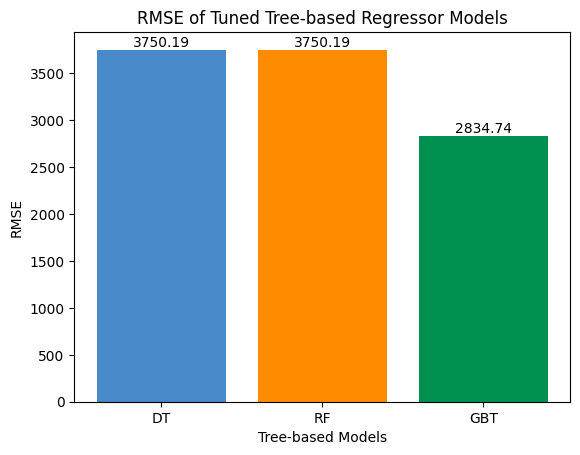

In [80]:
# Plotting performance comparison for all tree-based regressor models 

# Defining list of data 
Algorithms = ['DT', 'RF', 'GBT']
RMSE = [g1, g1, i1]

x_pos = np.arange(len(RMSE))

# Plotting bar charts with different colors
plt.bar(x_pos, RMSE, color=['#488AC7','#ff8c00','#009150'])
plt.xticks(x_pos, Algorithms)
plt.ylabel('RMSE')
plt.xlabel('Tree-based Models')
plt.title('RMSE of Tuned Tree-based Regressor Models')

# Adding labels to the bars
for i, v in enumerate(RMSE):
    plt.text(i, v, str(round(v, 2)), ha='center', va='bottom')

# Display plot
plt.show()

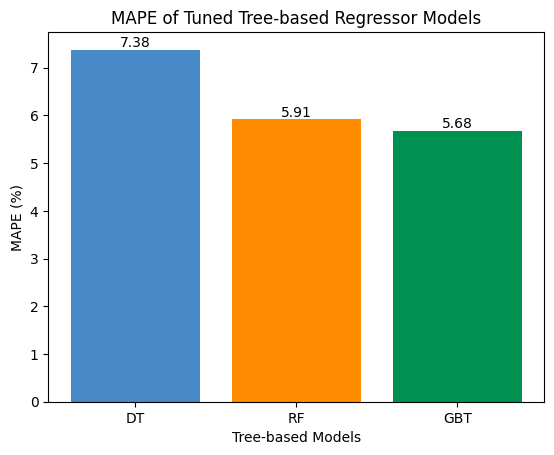

In [81]:
# Plotting performance comparison for all tree-based regressor models 

# Defining list of data 
Algorithms = ['DT', 'RF', 'GBT']
MAPE = [g2, h2, i2]

x_pos = np.arange(len(MAPE))

# Plotting bar charts with different colors
plt.bar(x_pos, MAPE, color=['#488AC7','#ff8c00','#009150'])
plt.xticks(x_pos, Algorithms)
plt.ylabel('MAPE (%)')
plt.xlabel('Tree-based Models')
plt.title('MAPE of Tuned Tree-based Regressor Models')

# Adding labels to the bars
for i, v in enumerate(MAPE):
    plt.text(i, v, str(round(v, 2)), ha='center', va='bottom')

# Display plot
plt.show()

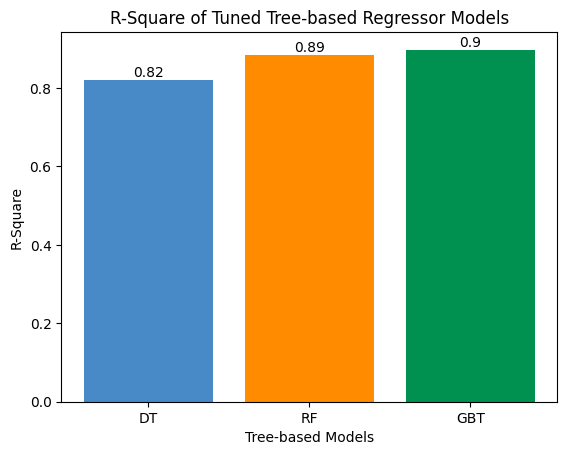

In [82]:
# Plotting performance comparison for all tree-based regressor models 

# Defining list of data 
Algorithms = ['DT', 'RF', 'GBT']
R_Square = [g3, h3, i3]

x_pos = np.arange(len(R_Square))

# Plotting bar charts with different colors
plt.bar(x_pos, R_Square, color=['#488AC7','#ff8c00','#009150'])
plt.xticks(x_pos, Algorithms)
plt.ylabel('R-Square')
plt.xlabel('Tree-based Models')
plt.title('R-Square of Tuned Tree-based Regressor Models')

# Adding labels to the bars
for i, v in enumerate(R_Square):
    plt.text(i, v, str(round(v, 2)), ha='center', va='bottom')

# Display plot
plt.show()

Best performing model for regression = GBT. However, as it was found to be underfitted it will not be selected as the optimal model candidate. Instead, the RF regressor will be selected as the optimal model candidate to be deployed for predicting rice yields in the system, as it performed the 2nd best with the least model fitness.


# 7.0 Deployment

In [83]:
# Importing necessary deployment/GUI libraries

import tkinter as tk
from tkinter import messagebox

### 7.1 Rice Recommendation Deployment

In [84]:
# To deploy RF classfier model

# Input GBT classifier model
rfc = RandomForestClassifier(random_state=1, max_depth=5, min_samples_split=2, min_samples_leaf=1)
rfc.fit(X_train_smote, y_train_smote)

# Create GUI window
window = tk.Tk()
window.title("Rice Recommendation Deployment Model")
window.geometry("750x500")

# Defining function to make predictions using the RF classifer model
def predict():
    feature1_value = float(entry1.get())
    feature2_value = float(entry2.get())
    feature3_value = float(entry3.get())
    feature4_value = float(entry4.get())
    feature5_value = float(entry5.get())
    feature6_value = float(entry6.get())
    feature7_value = float(entry7.get())
    
    # Creating new dataframe with the input values
    input_data = pd.DataFrame({'N': [feature1_value], 'P': [feature2_value], 'K': [feature3_value], 'Temperature': [feature4_value], 'Humidity': [feature5_value], 'pH Value': [feature6_value], 'Rainfall': [feature7_value]})

    # Making predictions using the RF classifer model
    prediction = rfc.predict(input_data.values)[0]

    # Display recommendation
    messagebox.showinfo("Recommendation", f"The recommended crop is: {prediction}")

# Creating input fields for features
label1 = tk.Label(window, text="Nitrogen (N) Content:", font=("Arial", 20))
label1.grid(row=0, column=0, padx=10, pady=10)
entry1 = tk.Entry(window, font=("Arial", 20))
entry1.grid(row=0, column=1, padx=10, pady=10)

label2 = tk.Label(window, text="Phosphorous (P) Content:", font=("Arial", 20))
label2.grid(row=1, column=0, padx=10, pady=10)
entry2 = tk.Entry(window, font=("Arial", 20))
entry2.grid(row=1, column=1, padx=10, pady=10)

label3 = tk.Label(window, text="Potassium (K) Content:", font=("Arial", 20))
label3.grid(row=2, column=0, padx=10, pady=10)
entry3 = tk.Entry(window, font=("Arial", 20))
entry3.grid(row=2, column=1, padx=10, pady=10)

label4 = tk.Label(window, text="Temperature in degree Celsius:", font=("Arial", 20))
label4.grid(row=3, column=0, padx=10, pady=10)
entry4 = tk.Entry(window, font=("Arial", 20))
entry4.grid(row=3, column=1, padx=10, pady=10)

label5 = tk.Label(window, text="Humidity in percentage:", font=("Arial", 20))
label5.grid(row=4, column=0, padx=10, pady=10)
entry5 = tk.Entry(window, font=("Arial", 20))
entry5.grid(row=4, column=1, padx=10, pady=10)

label6 = tk.Label(window, text="pH Value:", font=("Arial", 20))
label6.grid(row=5, column=0, padx=10, pady=10)
entry6 = tk.Entry(window, font=("Arial", 20))
entry6.grid(row=5, column=1, padx=10, pady=10)

label7 = tk.Label(window, text="Rainfall Volume in mm:", font=("Arial", 20))
label7.grid(row=6, column=0, padx=10, pady=10)
entry7 = tk.Entry(window, font=("Arial", 20))
entry7.grid(row=6, column=1, padx=10, pady=10)

# Creating button to trigger the recommendation
button = tk.Button(window, text="Recommend", command=predict, font=("Arial", 20))
button.grid(row=10, column=0, columnspan=2, padx=10, pady=10)


# Run the GUI main loop
window.mainloop()

### 7.2 Rice Yield Prediction Deployment

In [96]:
# To deploy RF regressor model

# Input tuned RF regressor model
tuned_rfr = RandomForestRegressor(random_state=1, max_depth=15, min_samples_split=2, min_samples_leaf=2)
tuned_rfr.fit(X_pred_train, y_pred_train)

# Create GUI window
window = tk.Tk()
window.title("Rice Yield Prediction Deployment Model")
window.geometry("750x300")

# Defining function to make predictions using the GBT regressor model
def predict():
    feature1_value = float(entry1.get())
    feature2_value = float(entry2.get())
    feature3_value = float(entry3.get())
    
    # Creating new dataframe with the input values
    input_data = pd.DataFrame({'Rainfall': [feature1_value], 'Temperature': [feature2_value], 'Planted Area': [feature3_value]})

    # Making predictions using the tuned GBT regressor  model
    prediction = tuned_dtr.predict(input_data)[0]

    # Display predictions
    messagebox.showinfo("Prediction", f"The predicted rice yield is: {round(prediction, 2)} (hg/ha)")

# Creating input fields for features
label1 = tk.Label(window, text="Rainfall Volume in mm:", font=("Arial", 20))
label1.grid(row=0, column=0, padx=10, pady=10)
entry1 = tk.Entry(window, font=("Arial", 20))
entry1.grid(row=0, column=1, padx=10, pady=10)

label2 = tk.Label(window, text="Temperature in degree Celsius:", font=("Arial", 20))
label2.grid(row=1, column=0, padx=10, pady=10)
entry2 = tk.Entry(window, font=("Arial", 20))
entry2.grid(row=1, column=1, padx=10, pady=10)

label3 = tk.Label(window, text="Planted Area in Hectare:", font=("Arial", 20))
label3.grid(row=2, column=0, padx=10, pady=10)
entry3 = tk.Entry(window, font=("Arial", 20))
entry3.grid(row=2, column=1, padx=10, pady=10)

# Creating button to trigger the prediction
button = tk.Button(window, text="Predict", command=predict, font=("Arial", 20))
button.grid(row=3, column=0, columnspan=2, padx=10, pady=10)


# Run the GUI main loop
window.mainloop()